In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
airbnb_df = pd.read_csv("Resources/cleaned_airbnb_data.csv", low_memory=False)
airbnb_df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002755                                               NaN  85098326012   
3  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
4  1005202                                   BlissArtsSpace!  90821839709   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington   
1               verified     Jenna           Manhattan             Midtown   
2            unconfirmed     Garry            Brooklyn        Clinton Hill   
3               verified    Lyndon           Manhattan         East Harlem   
4            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United States  ...       193.0            10.0   
1  40.75362 -73.98377  United States  ...        28.0            30.0   
2  40.68514 -73.95976  United States  ...        74.0            30.0   
3  40.79851 -73.94399  United States  ...        41.0            10.0   
4  40.68688 -73.95596  United States  ...       212.0            45.0   

  number of reviews last review  reviews per month  review rate number  \
0               9.0  2021-10-19               0.21                 4.0   
1              45.0  2022-05-21               0.38                 4.0   
2             270.0  2019-07-05               4.64                 4.0   
3               9.0  2018-11-19               0.10                 3.0   
4              49.0  2017-10-05               0.40                 5.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             322.0   
3                             1.0             289.0   
4                             1.0             219.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2                                                NaN     NaN  
3  Please no smoking in the house, porch or on th...     NaN  
4  House Guidelines for our BnB We are delighted ...     NaN  

[5 rows x 26 columns]

In [3]:
airbnb_df['price_with_currency'] = '$' + airbnb_df['price'].astype(str)
airbnb_df['price_with_currency']

0         $966
1         $142
2         $368
3         $204
4        $1060
         ...  
82101     $946
82102     $706
82103    $1043
82104     $809
82105    $1128
Name: price_with_currency, Length: 82106, dtype: object

# Distribution of Airbnb Properties in the Neighborhood groups

In [4]:
%%capture --no-display


# Configure the map plot
map_plot = airbnb_df.hvplot.points(
    "long",
    "lat",
    geo=True,
    tiles="OSM",
    color="neighbourhood group",
    line_color = 'black',
    alpha=0.3,
    frame_width=600,
    frame_height=400,
    hover_cols = ['price_with_currency','review rate number']
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (neighbourhood group,price_with_currency,review rate number)

#### Analysis: This map shows the visual representation of distribution of all the properties listed in airbnb. By looking at the maps, Staten Island seems to have the lowest number of listings.

# Average prices and rating of each Neighborhood Group

In [5]:
neighborhood_df_ds = airbnb_df[['lat','long','neighbourhood group','price','review rate number']].copy()
neighborhood_df_ds

lat      long neighbourhood group  price  review rate number
0      40.64749 -73.97237            Brooklyn    966                 4.0
1      40.75362 -73.98377           Manhattan    142                 4.0
2      40.68514 -73.95976            Brooklyn    368                 4.0
3      40.79851 -73.94399           Manhattan    204                 3.0
4      40.68688 -73.95596            Brooklyn   1060                 5.0
...         ...       ...                 ...    ...                 ...
82101  40.59380 -73.77373              Queens    946                 1.0
82102  40.79712 -73.96117           Manhattan    706                 4.0
82103  40.72318 -74.00223           Manhattan   1043                 4.0
82104  40.69095 -73.93444            Brooklyn    809                 1.0
82105  40.81315 -73.94747           Manhattan   1128                 4.0

[82106 rows x 5 columns]

In [6]:
grouped_df_ds = airbnb_df.groupby('neighbourhood group').agg({
    'long': 'mean',
    'lat': 'mean',
    'price': ['mean','min','max'],
    'review rate number': 'mean'
}).reset_index()
grouped_df_ds

neighbourhood group       long        lat       price            \
                            mean       mean        mean min   max   
0               Bronx -73.882433  40.849209  630.534627  50  1200   
1            Brooklyn -73.950067  40.683327  627.654762  50  1200   
2           Manhattan -73.973940  40.765875  624.346316  50  1200   
3              Queens -73.865733  40.727912  630.139808  50  1200   
4       Staten Island -74.104924  40.612046  623.234356  50  1200   

  review rate number  
                mean  
0           3.349801  
1           3.270551  
2           3.283044  
3           3.338036  
4           3.412270

In [7]:
grouped_df_ds.columns = ['Neighborhood Group', 'Mean Long', 'Mean Lat', 'Avg Price', 'Min Price', 'Max Price','Avg Rating']
grouped_df_ds['Avg Price'] = '$' + grouped_df_ds['Avg Price'].astype(str)
grouped_df_ds['Min Price'] = '$' + grouped_df_ds['Min Price'].astype(str)
grouped_df_ds['Max Price'] = '$' + grouped_df_ds['Max Price'].astype(str)
grouped_df_ds['Attractions'] = ''
grouped_df_ds

Neighborhood Group  Mean Long   Mean Lat           Avg Price Min Price  \
0              Bronx -73.882433  40.849209   $630.534627260697       $50   
1           Brooklyn -73.950067  40.683327  $627.6547622543981       $50   
2          Manhattan -73.973940  40.765875  $624.3463160067223       $50   
3             Queens -73.865733  40.727912  $630.1398082835956       $50   
4      Staten Island -74.104924  40.612046  $623.2343558282208       $50   

  Max Price  Avg Rating Attractions  
0     $1200    3.349801              
1     $1200    3.270551              
2     $1200    3.283044              
3     $1200    3.338036              
4     $1200    3.412270

In [8]:
# Set parameters to search for attractions
radius = 100000
params = {
    "categories":"tourism.attraction",
    "apiKey":geoapify_key,
    "limit":20
}

# Print a message to follow up the hotel search
print("Starting attractions search")

# Iterate through the grouped_df DataFrame
for index, row in grouped_df_ds.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = grouped_df_ds.loc[index,'Mean Lat']
    longitude = grouped_df_ds.loc[index,'Mean Long']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    attractions = requests.get(base_url,params=params)
    
    # Convert the API response to JSON format
    attractions = attractions.json()
    
    #Sometimes the 'name' does not appear in the response, hence go through the entire list.
    attraction_list = []
    i = 0
    while(i < len(attractions.get("features", []))):
        try:
            name = attractions['features'][i]['properties']['name']
            attraction_list.append(name)
            if(len(attraction_list) == 3):
                break
            
        except (KeyError):
            pass
        i+=1
        
    try:
        grouped_df_ds.loc[index, "Attractions"] =  ', '.join(attraction_list)

        
    except (KeyError, IndexError):
        # If no attraction is found, set the attraction column as "No attraction found".
        grouped_df_ds.loc[index, "Attractions"] = "No attractions found"
    
        
    # Log the search results
    print(f"{grouped_df_ds.loc[index, 'Neighborhood Group']} - nearest attractions: {grouped_df_ds.loc[index, 'Attractions']}")

Starting attractions search
Bronx - nearest attractions: Flamingos, Congo Gorilla Forest, African Wild Dogs
Brooklyn - nearest attractions: Yusuf Hawkins, Mathematical Star, ODB Mural
Manhattan - nearest attractions: Thomas Moore, Gapstow Bridge, William Tecumseh Sherman
Queens - nearest attractions: Once Upon a Time/ Paper Jungle, Waking Blind, African American Marbleization
Staten Island - nearest attractions: Wingdale, Jurassic Park, Pierre Billiou House


In [9]:
grouped_df_ds['No. of listings in neighborhood'] = airbnb_df['neighbourhood group'].value_counts().values
grouped_df_ds

Neighborhood Group  Mean Long   Mean Lat           Avg Price Min Price  \
0              Bronx -73.882433  40.849209   $630.534627260697       $50   
1           Brooklyn -73.950067  40.683327  $627.6547622543981       $50   
2          Manhattan -73.973940  40.765875  $624.3463160067223       $50   
3             Queens -73.865733  40.727912  $630.1398082835956       $50   
4      Staten Island -74.104924  40.612046  $623.2343558282208       $50   

  Max Price  Avg Rating                                        Attractions  \
0     $1200    3.349801  Flamingos, Congo Gorilla Forest, African Wild ...   
1     $1200    3.270551        Yusuf Hawkins, Mathematical Star, ODB Mural   
2     $1200    3.283044  Thomas Moore, Gapstow Bridge, William Tecumseh...   
3     $1200    3.338036  Once Upon a Time/ Paper Jungle, Waking Blind, ...   
4     $1200    3.412270      Wingdale, Jurassic Park, Pierre Billiou House   

   No. of listings in neighborhood  
0                            34049  
1                            33917  
2                            11058  
3                             2267  
4                              815

In [10]:
%%capture --no-display


#The display is too big, hence scaling down.
grouped_df_ds['Scaled Neighborhoods'] = 0.5 * grouped_df_ds['No. of listings in neighborhood']

# Configure the map plot
group_plot = grouped_df_ds.hvplot.points(
    "Mean Long",
    "Mean Lat",
    geo=True,
    tiles="OSM",
    size="Scaled Neighborhoods",
    color="Neighborhood Group",
    alpha=0.8,
    frame_width=400,
    frame_height=450,
    hover_cols = ['Avg Price','Min Price','Max Price','Avg Rating','Attractions']
)

# Display the map
group_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Mean Long,Mean Lat]   (Neighborhood Group,Scaled Neighborhoods,Avg Price,Min Price,Max Price,Avg Rating,Attractions)

#### Analysis: By looking at the plot, Bronx has the most number of listings and is slightly higher than Brooklyn and Staten Island has the lowest number of listings. The average price of the neighborhood groups is in the range 620 dollars to 630 dollars. The minimum and maximum prices are 50 dollars and 1200 dollars respectively in all of the neighborhoods. The nearby attractions are listed which can be a deciding factor for choosing a neighorhood to stay.

# 10 most expensive places with best ratings and attractions

In [11]:
airbnb_df_ds=airbnb_df.sort_values(by=['price','review rate number'],ascending=False)
airbnb_df_ds.head()

id                                              NAME  \
12800  11376292  An Urban Oasis in the Heart of Downtown Brooklyn   
30595  23225336   Big studio across the street from Prospect Park   
39369  30401922                Hot-Tub and King beds in Brooklyn!   
48570  35580287  One cozy bedroom near Verrazano bridge and ferry   
50253  36516435               Great 1BD waterfront City Island NY   

           host id host_identity_verified host name neighbourhood group  \
12800  31730484107            unconfirmed    Alicia            Brooklyn   
30595  48618616445               verified    Mariel            Brooklyn   
39369  10531887449               verified    Jeremy            Brooklyn   
48570  32202051101            unconfirmed  Chun Kit       Staten Island   
50253  83460973881               verified      Alex               Bronx   

                   neighbourhood       lat      long        country  ...  \
12800                Boerum Hill  40.68475 -73.97986  United States  ...   
30595  Prospect-Lefferts Gardens  40.66042 -73.96129  United States  ...   
39369         Bedford-Stuyvesant  40.69493 -73.94314  United States  ...   
48570                Shore Acres  40.61126 -74.06789  United States  ...   
50253                City Island  40.85343 -73.78811  United States  ...   

      minimum nights  number of reviews last review reviews per month  \
12800            2.0               10.0  2019-04-28              0.29   
30595            2.0                7.0  2019-06-30              1.28   
39369            2.0              311.0  2022-02-18              4.16   
48570            1.0                5.0  2021-11-07              0.59   
50253           30.0              108.0  2021-08-25              1.09   

       review rate number  calculated host listings count  availability 365  \
12800                 5.0                             1.0              11.0   
30595                 5.0                             1.0              29.0   
39369                 5.0                             1.0             128.0   
48570                 5.0                             1.0               0.0   
50253                 5.0                             1.0              31.0   

                         house_rules  license price_with_currency  
12800  No smoking except smoke deck.      NaN               $1200  
30595                            NaN      NaN               $1200  
39369                            NaN      NaN               $1200  
48570                            NaN      NaN               $1200  
50253                            NaN      NaN               $1200  

[5 rows x 27 columns]

In [12]:
most_expensive_df_ds = airbnb_df_ds[['lat','long','neighbourhood group','neighbourhood','room type','price','service fee','minimum nights',
                               'review rate number']].copy().head(10)
most_expensive_df_ds

lat      long neighbourhood group              neighbourhood  \
12800  40.68475 -73.97986            Brooklyn                Boerum Hill   
30595  40.66042 -73.96129            Brooklyn  Prospect-Lefferts Gardens   
39369  40.69493 -73.94314            Brooklyn         Bedford-Stuyvesant   
48570  40.61126 -74.06789       Staten Island                Shore Acres   
50253  40.85343 -73.78811               Bronx                City Island   
51073  40.77965 -73.90728              Queens           Ditmars Steinway   
53248  40.72790 -73.98347           Manhattan               East Village   
60697  40.68475 -73.97986            Brooklyn                Boerum Hill   
70777  40.68475 -73.97986            Brooklyn                Boerum Hill   
6985   40.64569 -73.94776            Brooklyn              East Flatbush   

             room type  price  service fee  minimum nights  review rate number  
12800  Entire home/apt   1200        240.0             2.0                 5.0  
30595  Entire home/apt   1200        240.0             2.0                 5.0  
39369  Entire home/apt   1200        240.0             2.0                 5.0  
48570     Private room   1200        240.0             1.0                 5.0  
50253  Entire home/apt   1200        240.0            30.0                 5.0  
51073  Entire home/apt   1200        240.0            60.0                 5.0  
53248  Entire home/apt   1200        240.0            30.0                 5.0  
60697  Entire home/apt   1200        240.0             2.0                 5.0  
70777  Entire home/apt   1200        240.0             2.0                 5.0  
6985   Entire home/apt   1200        240.0            30.0                 4.0

In [13]:
most_expensive_df_ds['Location'] = most_expensive_df_ds['neighbourhood'].astype(str) + ',' + most_expensive_df_ds['neighbourhood group']
most_expensive_df_ds.drop(['neighbourhood group','neighbourhood'], axis=1, inplace=True)
most_expensive_df_ds

lat      long        room type  price  service fee  \
12800  40.68475 -73.97986  Entire home/apt   1200        240.0   
30595  40.66042 -73.96129  Entire home/apt   1200        240.0   
39369  40.69493 -73.94314  Entire home/apt   1200        240.0   
48570  40.61126 -74.06789     Private room   1200        240.0   
50253  40.85343 -73.78811  Entire home/apt   1200        240.0   
51073  40.77965 -73.90728  Entire home/apt   1200        240.0   
53248  40.72790 -73.98347  Entire home/apt   1200        240.0   
60697  40.68475 -73.97986  Entire home/apt   1200        240.0   
70777  40.68475 -73.97986  Entire home/apt   1200        240.0   
6985   40.64569 -73.94776  Entire home/apt   1200        240.0   

       minimum nights  review rate number                            Location  
12800             2.0                 5.0                Boerum Hill,Brooklyn  
30595             2.0                 5.0  Prospect-Lefferts Gardens,Brooklyn  
39369             2.0                 5.0         Bedford-Stuyvesant,Brooklyn  
48570             1.0                 5.0           Shore Acres,Staten Island  
50253            30.0                 5.0                   City Island,Bronx  
51073            60.0                 5.0             Ditmars Steinway,Queens  
53248            30.0                 5.0              East Village,Manhattan  
60697             2.0                 5.0                Boerum Hill,Brooklyn  
70777             2.0                 5.0                Boerum Hill,Brooklyn  
6985             30.0                 4.0              East Flatbush,Brooklyn

In [14]:
most_expensive_df_ds = most_expensive_df_ds.rename(columns={'lat':'Latitude','long':'Longitude','room type':'Room Type','price':'Price','service fee':'Service Fee',
                                                     'minimum nights':'Minimum Nights','review rate number':'Rating'})
most_expensive_df_ds = most_expensive_df_ds[['Latitude','Longitude','Price','Service Fee','Room Type','Location','Rating','Minimum Nights']]
most_expensive_df_ds['Attractions'] = ''
most_expensive_df_ds

Latitude  Longitude  Price  Service Fee        Room Type  \
12800  40.68475  -73.97986   1200        240.0  Entire home/apt   
30595  40.66042  -73.96129   1200        240.0  Entire home/apt   
39369  40.69493  -73.94314   1200        240.0  Entire home/apt   
48570  40.61126  -74.06789   1200        240.0     Private room   
50253  40.85343  -73.78811   1200        240.0  Entire home/apt   
51073  40.77965  -73.90728   1200        240.0  Entire home/apt   
53248  40.72790  -73.98347   1200        240.0  Entire home/apt   
60697  40.68475  -73.97986   1200        240.0  Entire home/apt   
70777  40.68475  -73.97986   1200        240.0  Entire home/apt   
6985   40.64569  -73.94776   1200        240.0  Entire home/apt   

                                 Location  Rating  Minimum Nights Attractions  
12800                Boerum Hill,Brooklyn     5.0             2.0              
30595  Prospect-Lefferts Gardens,Brooklyn     5.0             2.0              
39369         Bedford-Stuyvesant,Brooklyn     5.0             2.0              
48570           Shore Acres,Staten Island     5.0             1.0              
50253                   City Island,Bronx     5.0            30.0              
51073             Ditmars Steinway,Queens     5.0            60.0              
53248              East Village,Manhattan     5.0            30.0              
60697                Boerum Hill,Brooklyn     5.0             2.0              
70777                Boerum Hill,Brooklyn     5.0             2.0              
6985               East Flatbush,Brooklyn     4.0            30.0

In [15]:
# Set parameters to search for attractions
radius = 50000
params = {
    "categories":"tourism.attraction",
    "apiKey":geoapify_key,
    "limit":20
}

# Print a message to follow up the hotel search
print("Starting attractions search")

# Iterate through the grouped_df DataFrame
for index, row in most_expensive_df_ds.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = most_expensive_df_ds.loc[index,'Latitude']
    longitude = most_expensive_df_ds.loc[index,'Longitude']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    attractions = requests.get(base_url,params=params)
    
    # Convert the API response to JSON format
    attractions = attractions.json()
    
    #Sometimes the 'name' does not appear in the response, hence go through the entire list.
    attraction_list = []
    i = 0
    while(i < len(attractions.get("features", []))):
        try:
            name = attractions['features'][i]['properties']['name']
            attraction_list.append(name)
            if(len(attraction_list) == 3):
                break
            
        except (KeyError):
            pass
        i+=1
        
    try:
        most_expensive_df_ds.loc[index, "Attractions"] =  ', '.join(attraction_list)
        
    except (KeyError, IndexError):
        # If no attraction is found, set the attraction column as "No attraction found".
        most_expensive_df_ds.loc[index, "Attractions"] = "No attractions found"

        
    # Log the search results
    print(f"{most_expensive_df_ds.loc[index, 'Location']} - nearest attractions: {most_expensive_df_ds.loc[index, 'Attractions']}")

Starting attractions search
Boerum Hill,Brooklyn - nearest attractions: Rose, General Edward Fowler, Mosaic House
Prospect-Lefferts Gardens,Brooklyn - nearest attractions: Washington Irving Memorial, Dragon Fountain, Grieg
Bedford-Stuyvesant,Brooklyn - nearest attractions: Shai Asia Semple, Mathematical Star, Yusuf Hawkins
Shore Acres,Staten Island - nearest attractions: Eyes, Overlook, The Gingerbread House
City Island,Bronx - nearest attractions: Wilhelm Tell, Dolphin, Shamrock
Ditmars Steinway,Queens - nearest attractions: Lucky, Columbus, Q100
East Village,Manhattan - nearest attractions: Couv Led Zepp 5e album, Michael Jackson Mural, Penn Station Eagle
Boerum Hill,Brooklyn - nearest attractions: Rose, General Edward Fowler, Mosaic House
Boerum Hill,Brooklyn - nearest attractions: Rose, General Edward Fowler, Mosaic House
East Flatbush,Brooklyn - nearest attractions: Now & Then, Drummer's Grove, Dragon Fountain


In [16]:
%%capture --no-display

# Configure the map plot
most_expensive_plot = most_expensive_df_ds.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size="Price",
    color="Location",
    #line_color = 'black',
    alpha=0.8,
    frame_width=400,
    frame_height=450,
    hover_cols = ['Price','Service Fee','Room Type','Location','Rating','Minimum Nights','Attractions']
)

# Display the map
most_expensive_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Location,Price,Service Fee,Room Type,Rating,Minimum Nights,Attractions)

#### Analysis: This is sample data of most expensive places with best ratings. Although every neighborhood has expensive listings,  most number of expensive places seem to be in Brooklyn. This data shows that these expensive listings do not belong to a particular room type. 

# 10 least expensive places with best ratings and attractions

In [17]:
airbnb_df_ds=airbnb_df.sort_values(by=['price','review rate number'],ascending=[True,False])

least_expensive_df_ds = airbnb_df_ds[['lat','long','neighbourhood group','neighbourhood','room type','price','service fee','minimum nights',
                               'review rate number']].copy().head(10)

least_expensive_df_ds

lat      long neighbourhood group              neighbourhood  \
3215   40.70943 -73.94948            Brooklyn               Williamsburg   
16637  40.70849 -73.96190            Brooklyn               Williamsburg   
21007  40.67096 -73.95261            Brooklyn              Crown Heights   
30698  40.75681 -73.99865           Manhattan             Hell's Kitchen   
30802  40.82964 -73.94271           Manhattan                     Harlem   
37299  40.66089 -73.94728            Brooklyn  Prospect-Lefferts Gardens   
38774  40.64837 -73.96924            Brooklyn                   Flatbush   
43678  40.67324 -73.95800            Brooklyn              Crown Heights   
47131  40.67360 -73.81504              Queens           South Ozone Park   
47208  40.64030 -73.89549            Brooklyn                   Canarsie   

             room type  price  service fee  minimum nights  review rate number  
3215      Private room     50         10.0             5.0                 5.0  
16637     Private room     50         10.0             1.0                 5.0  
21007     Private room     50         10.0             2.0                 5.0  
30698     Private room     50         10.0             1.0                 5.0  
30802  Entire home/apt     50         10.0             2.0                 5.0  
37299  Entire home/apt     50         10.0             2.0                 5.0  
38774  Entire home/apt     50         10.0             3.0                 5.0  
43678  Entire home/apt     50         10.0             1.0                 5.0  
47131     Private room     50         10.0             1.0                 5.0  
47208     Private room     50         10.0             2.0                 5.0

In [18]:
least_expensive_df_ds['Location'] = least_expensive_df_ds['neighbourhood'].astype(str) + ',' + least_expensive_df_ds['neighbourhood group']
least_expensive_df_ds.drop(['neighbourhood group','neighbourhood'], axis=1, inplace=True)
least_expensive_df_ds

lat      long        room type  price  service fee  \
3215   40.70943 -73.94948     Private room     50         10.0   
16637  40.70849 -73.96190     Private room     50         10.0   
21007  40.67096 -73.95261     Private room     50         10.0   
30698  40.75681 -73.99865     Private room     50         10.0   
30802  40.82964 -73.94271  Entire home/apt     50         10.0   
37299  40.66089 -73.94728  Entire home/apt     50         10.0   
38774  40.64837 -73.96924  Entire home/apt     50         10.0   
43678  40.67324 -73.95800  Entire home/apt     50         10.0   
47131  40.67360 -73.81504     Private room     50         10.0   
47208  40.64030 -73.89549     Private room     50         10.0   

       minimum nights  review rate number                            Location  
3215              5.0                 5.0               Williamsburg,Brooklyn  
16637             1.0                 5.0               Williamsburg,Brooklyn  
21007             2.0                 5.0              Crown Heights,Brooklyn  
30698             1.0                 5.0            Hell's Kitchen,Manhattan  
30802             2.0                 5.0                    Harlem,Manhattan  
37299             2.0                 5.0  Prospect-Lefferts Gardens,Brooklyn  
38774             3.0                 5.0                   Flatbush,Brooklyn  
43678             1.0                 5.0              Crown Heights,Brooklyn  
47131             1.0                 5.0             South Ozone Park,Queens  
47208             2.0                 5.0                   Canarsie,Brooklyn

In [19]:
least_expensive_df_ds = least_expensive_df_ds.rename(columns={'lat':'Latitude','long':'Longitude','room type':'Room Type','price':'Price','service fee':'Service Fee',
                                                     'minimum nights':'Minimum Nights','review rate number':'Rating'})
least_expensive_df_ds = least_expensive_df_ds[['Latitude','Longitude','Price','Service Fee','Room Type','Location','Rating','Minimum Nights']]
least_expensive_df_ds['Attractions'] = ''
least_expensive_df_ds

Latitude  Longitude  Price  Service Fee        Room Type  \
3215   40.70943  -73.94948     50         10.0     Private room   
16637  40.70849  -73.96190     50         10.0     Private room   
21007  40.67096  -73.95261     50         10.0     Private room   
30698  40.75681  -73.99865     50         10.0     Private room   
30802  40.82964  -73.94271     50         10.0  Entire home/apt   
37299  40.66089  -73.94728     50         10.0  Entire home/apt   
38774  40.64837  -73.96924     50         10.0  Entire home/apt   
43678  40.67324  -73.95800     50         10.0  Entire home/apt   
47131  40.67360  -73.81504     50         10.0     Private room   
47208  40.64030  -73.89549     50         10.0     Private room   

                                 Location  Rating  Minimum Nights Attractions  
3215                Williamsburg,Brooklyn     5.0             5.0              
16637               Williamsburg,Brooklyn     5.0             1.0              
21007              Crown Heights,Brooklyn     5.0             2.0              
30698            Hell's Kitchen,Manhattan     5.0             1.0              
30802                    Harlem,Manhattan     5.0             2.0              
37299  Prospect-Lefferts Gardens,Brooklyn     5.0             2.0              
38774                   Flatbush,Brooklyn     5.0             3.0              
43678              Crown Heights,Brooklyn     5.0             1.0              
47131             South Ozone Park,Queens     5.0             1.0              
47208                   Canarsie,Brooklyn     5.0             2.0

In [20]:
# Set parameters to search for attractions
radius = 50000
params = {
    "categories":"tourism.attraction",
    "apiKey":geoapify_key,
    "limit":20
}

# Print a message to follow up the hotel search
print("Starting attractions search")

# Iterate through the grouped_df DataFrame
for index, row in least_expensive_df_ds.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = least_expensive_df_ds.loc[index,'Latitude']
    longitude = least_expensive_df_ds.loc[index,'Longitude']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    attractions = requests.get(base_url,params=params)
    
    # Convert the API response to JSON format
    attractions = attractions.json()
    
    #Sometimes the 'name' does not appear in the response, hence go through the entire list.
    attraction_list = []
    i = 0
    while(i < len(attractions.get("features", []))):
        try:
            name = attractions['features'][i]['properties']['name']
            attraction_list.append(name)
            if(len(attraction_list) == 3):
                break
            
        except (KeyError):
            pass
        i+=1
        
    try:
        least_expensive_df_ds.loc[index, "Attractions"] =  ', '.join(attraction_list)
        
    except (KeyError, IndexError):
        # If no attraction is found, set the attraction column as "No attraction found".
        least_expensive_df_ds.loc[index, "Attractions"] = "No attractions found"

        
    # Log the search results
    print(f"{least_expensive_df_ds.loc[index, 'Location']} - nearest attractions: {least_expensive_df_ds.loc[index, 'Attractions']}")

Starting attractions search
Williamsburg,Brooklyn - nearest attractions: Prayer, Virgin Mary, 9/11
Williamsburg,Brooklyn - nearest attractions: Bucket Conveyor, Old crane, Lounge Screw Conveyor
Crown Heights,Brooklyn - nearest attractions: OY/YO, The Overlook, Yusuf Hawkins
Hell's Kitchen,Manhattan - nearest attractions: Big Apple, Ascension, Edge
Harlem,Manhattan - nearest attractions: Invisible Man: A Memorial to Ralph Ellison, Sylvan Terrace, La casa de los Tenenbaums
Prospect-Lefferts Gardens,Brooklyn - nearest attractions: Dragon Fountain, Washington Irving Memorial, Drummer's Grove
Flatbush,Brooklyn - nearest attractions: Horse Tamers, Hammerhead Peninsula, Drummer's Grove
Crown Heights,Brooklyn - nearest attractions: OY/YO, The Overlook, Henry W. Maxwell Memorial
South Ozone Park,Queens - nearest attractions: Mastodon, Frog, Frog
Canarsie,Brooklyn - nearest attractions: Belt Parkway Lookout, Wyckoff House Museum, Skybowl


In [21]:
%%capture --no-display

# Configure the map plot
least_expensive_plot = least_expensive_df_ds.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size="Price",
    color="Location",
    line_color = 'black',
    alpha=0.8,
    frame_width=300,
    frame_height=350,
    hover_cols = ['Price','Service Fee','Room Type','Location','Rating','Minimum Nights','Attractions']
)

# Display the map
least_expensive_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Location,Price,Service Fee,Room Type,Rating,Minimum Nights,Attractions)

#### Analysis: This plot shows a sample of the least expensive listings with best ratings. Most of the low priced properties are from Brooklyn. The room types are different even at this lower price, indicating low price does not depend on room type.

# Merged plot of both most and least expensive properties for comparison

In [22]:
merged_df_ds = most_expensive_df_ds.merge(least_expensive_df_ds, how='outer')
merged_df_ds

Latitude  Longitude  Price  Service Fee        Room Type  \
0   40.68475  -73.97986   1200        240.0  Entire home/apt   
1   40.68475  -73.97986   1200        240.0  Entire home/apt   
2   40.68475  -73.97986   1200        240.0  Entire home/apt   
3   40.66042  -73.96129   1200        240.0  Entire home/apt   
4   40.69493  -73.94314   1200        240.0  Entire home/apt   
5   40.61126  -74.06789   1200        240.0     Private room   
6   40.85343  -73.78811   1200        240.0  Entire home/apt   
7   40.77965  -73.90728   1200        240.0  Entire home/apt   
8   40.72790  -73.98347   1200        240.0  Entire home/apt   
9   40.64569  -73.94776   1200        240.0  Entire home/apt   
10  40.70943  -73.94948     50         10.0     Private room   
11  40.70849  -73.96190     50         10.0     Private room   
12  40.67096  -73.95261     50         10.0     Private room   
13  40.75681  -73.99865     50         10.0     Private room   
14  40.82964  -73.94271     50         10.0  Entire home/apt   
15  40.66089  -73.94728     50         10.0  Entire home/apt   
16  40.64837  -73.96924     50         10.0  Entire home/apt   
17  40.67324  -73.95800     50         10.0  Entire home/apt   
18  40.67360  -73.81504     50         10.0     Private room   
19  40.64030  -73.89549     50         10.0     Private room   

                              Location  Rating  Minimum Nights  \
0                 Boerum Hill,Brooklyn     5.0             2.0   
1                 Boerum Hill,Brooklyn     5.0             2.0   
2                 Boerum Hill,Brooklyn     5.0             2.0   
3   Prospect-Lefferts Gardens,Brooklyn     5.0             2.0   
4          Bedford-Stuyvesant,Brooklyn     5.0             2.0   
5            Shore Acres,Staten Island     5.0             1.0   
6                    City Island,Bronx     5.0            30.0   
7              Ditmars Steinway,Queens     5.0            60.0   
8               East Village,Manhattan     5.0            30.0   
9               East Flatbush,Brooklyn     4.0            30.0   
10               Williamsburg,Brooklyn     5.0             5.0   
11               Williamsburg,Brooklyn     5.0             1.0   
12              Crown Heights,Brooklyn     5.0             2.0   
13            Hell's Kitchen,Manhattan     5.0             1.0   
14                    Harlem,Manhattan     5.0             2.0   
15  Prospect-Lefferts Gardens,Brooklyn     5.0             2.0   
16                   Flatbush,Brooklyn     5.0             3.0   
17              Crown Heights,Brooklyn     5.0             1.0   
18             South Ozone Park,Queens     5.0             1.0   
19                   Canarsie,Brooklyn     5.0             2.0   

                                          Attractions  
0           Rose, General Edward Fowler, Mosaic House  
1           Rose, General Edward Fowler, Mosaic House  
2           Rose, General Edward Fowler, Mosaic House  
3   Washington Irving Memorial, Dragon Fountain, G...  
4   Shai Asia Semple, Mathematical Star, Yusuf Haw...  
5               Eyes, Overlook, The Gingerbread House  
6                     Wilhelm Tell, Dolphin, Shamrock  
7                               Lucky, Columbus, Q100  
8   Couv Led Zepp 5e album, Michael Jackson Mural,...  
9        Now & Then, Drummer's Grove, Dragon Fountain  
10                          Prayer, Virgin Mary, 9/11  
11  Bucket Conveyor, Old crane, Lounge Screw Conveyor  
12                 OY/YO, The Overlook, Yusuf Hawkins  
13                         Big Apple, Ascension, Edge  
14  Invisible Man: A Memorial to Ralph Ellison, Sy...  
15  Dragon Fountain, Washington Irving Memorial, D...  
16  Horse Tamers, Hammerhead Peninsula, Drummer's ...  
17     OY/YO, The Overlook, Henry W. Maxwell Memorial  
18                               Mastodon, Frog, Frog  
19  Belt Parkway Lookout, Wyckoff House Museum, Sk...

In [23]:
%%capture --no-display

# Configure the map plot
merged_plot = merged_df_ds.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size="Price",
    color="Location",
    line_color = 'black',
    alpha=0.8,
    frame_width=400,
    frame_height=450,
    hover_cols = ['Price','Service Fee','Room Type','Location','Rating','Minimum Nights','Attractions']
)

# Display the map
merged_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Location,Price,Service Fee,Room Type,Rating,Minimum Nights,Attractions)

#### Analysis: Plotted the merged map to know the distribution of most expensive and least expensive listings in the neighborhoods. As seen from the plot, there do not seem to be any difference in the price based on the location.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Count by room type

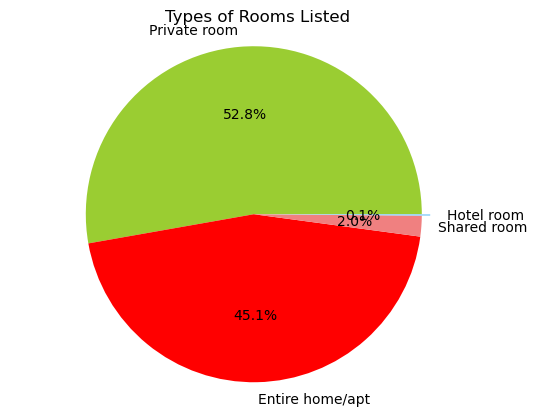

In [25]:
plt.title('Types of Rooms Listed')
room_types = airbnb_df['room type']
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0, 0, 0.05)
plt.pie(room_types.value_counts(), explode=explode, labels=room_types.unique(), colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

#### Analysis: Based on this plot, we can see that the highest number of room types is 'private room' and 'hotel room' is the lowest.